### We need to perform exploratory data analysis to gain insights into the distribution and relationships of the features in the dataset. We can use visualizations and statistical tests to identify any patterns or correlations that may be useful for modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# lets read all the cleaned datasets
df1 = pd.read_csv('C:/Users/Lenovo/1. Data Quality Assessment/2. Cleaned Data/1.1-Transactions.csv')
df2 = pd.read_csv('C:/Users/Lenovo/1. Data Quality Assessment/2. Cleaned Data/1.3-CustomerDemographic.csv')
df3 = pd.read_csv('C:/Users/Lenovo/1. Data Quality Assessment/2. Cleaned Data/1.4-CustomerAddress.csv')
df4 = pd.read_csv('C:/Users/Lenovo/1. Data Quality Assessment/2. Cleaned Data/1.2-NewCustomerList.csv')

We can merge the customer demographic, address, and transaction datasets to create a single, unified dataset.

In [3]:
customers_df = df2.merge(df3, on='customer_id').merge(df1, on='customer_id')

In [4]:
customers_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01 10:31:13.000000000
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 10:42:53.000000000
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1970-01-01 09:17:35.000000000
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1970-01-01 09:49:38.000000000
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 10:58:46.000000000


In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   first_name                           19968 non-null  object 
 2   last_name                            19326 non-null  object 
 3   gender                               19968 non-null  object 
 4   past_3_years_bike_related_purchases  19968 non-null  int64  
 5   DOB                                  19968 non-null  object 
 6   job_title                            19968 non-null  object 
 7   job_industry_category                19968 non-null  object 
 8   wealth_segment                       19968 non-null  object 
 9   deceased_indicator                   19968 non-null  bool   
 10  owns_car                             19968 non-null  bool   
 11  tenure                      

In [6]:
# the columns DOB and product_first_sold_date are object type so convert it to datetime
customers_df['product_first_sold_date'] = pd.to_datetime(customers_df['product_first_sold_date'])
customers_df['DOB'] = pd.to_datetime(customers_df['DOB'])

In [7]:
customers_df['transaction_date'] = pd.to_datetime(customers_df['transaction_date'])

In [8]:
customers_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              642
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [9]:
customers_df['last_name'].fillna('', inplace=True)

As mentioned in the tips lets change **DOB** column to a calculated **age** and **age_class** fields.

In [10]:
now = dt.datetime.now()
customers_df['age'] = (now - customers_df['DOB']).dt.days // 365

In [11]:
customers_df['age_class'] = round(customers_df['age']/10) * 10

In [12]:
# so Jephthah is 179 years old. 
customers_df[customers_df['age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age,age_class
171,34,Jephthah,Bachmann,Unidentified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,False,...,Approved,WeareA2B,Standard,medium,medium,1231.15,161.600,1970-01-01 10:36:56.000,179,180.0
172,34,Jephthah,Bachmann,Unidentified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,False,...,Approved,WeareA2B,Touring,medium,medium,1034.17,909.155,1970-01-01 11:11:04.250,179,180.0
173,34,Jephthah,Bachmann,Unidentified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,False,...,Approved,Solex,Touring,medium,large,2083.94,675.030,1970-01-01 11:32:13.000,179,180.0
174,34,Jephthah,Bachmann,Unidentified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,False,...,Approved,WeareA2B,Road,low,small,1172.78,1043.770,1970-01-01 10:25:39.000,179,180.0
175,34,Jephthah,Bachmann,Unidentified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,False,...,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.850,1970-01-01 11:19:39.000,179,180.0
176,34,Jephthah,Bachmann,Unidentified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,False,...,Approved,Solex,Road,medium,small,1703.52,1516.130,1970-01-01 11:17:29.000,179,180.0
177,34,Jephthah,Bachmann,Unidentified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,False,...,Approved,Solex,Standard,medium,medium,1163.89,589.270,1970-01-01 11:49:20.000,179,180.0
178,34,Jephthah,Bachmann,Unidentified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,False,...,Approved,Norco Bicycles,Standard,low,medium,958.74,748.900,1970-01-01 10:44:53.000,179,180.0
179,34,Jephthah,Bachmann,Unidentified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,False,...,Approved,WeareA2B,Standard,medium,medium,1807.45,778.690,1970-01-01 11:42:25.000,179,180.0


In [13]:
# considered an outlier so drop those records
customers_df.drop(customers_df[customers_df['age'] > 100].index, inplace=True)

In [14]:
customers_df.nunique()

customer_id                             3488
first_name                              2834
last_name                               3263
gender                                     3
past_3_years_bike_related_purchases      100
DOB                                     3046
job_title                                195
job_industry_category                      9
wealth_segment                             3
deceased_indicator                         2
owns_car                                   2
tenure                                    22
address                                 3486
postcode                                 835
state                                      3
country                                    1
property_valuation                        12
transaction_id                         19959
product_id                               101
transaction_date                         364
online_order                               2
order_status                               2
brand     

.


#### Univariate analysis:
Analyze each feature separately to understand its distribution, range, and outliers.
* For categorical variables, we can plot bar charts or pie charts to show the frequency of each category.
* For continuous variables, we can plot histograms, boxplots, and density plots. 

In [15]:
customers_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age,age_class
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01 10:31:13,69,70.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 10:42:53,69,70.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1970-01-01 09:17:35,69,70.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1970-01-01 09:49:38,69,70.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 10:58:46,69,70.0


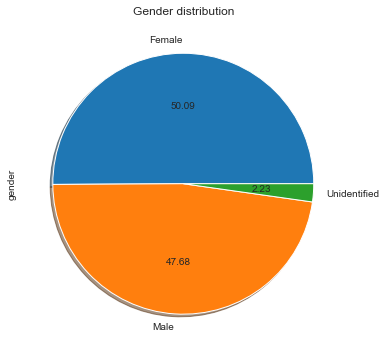

In [16]:
# Let's see the gender distribution across the dataset
plt.figure(figsize=(10, 6))
customers_df['gender'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True)
plt.title('Gender distribution')
plt.savefig('Gender distribution-1.png')
plt.show()

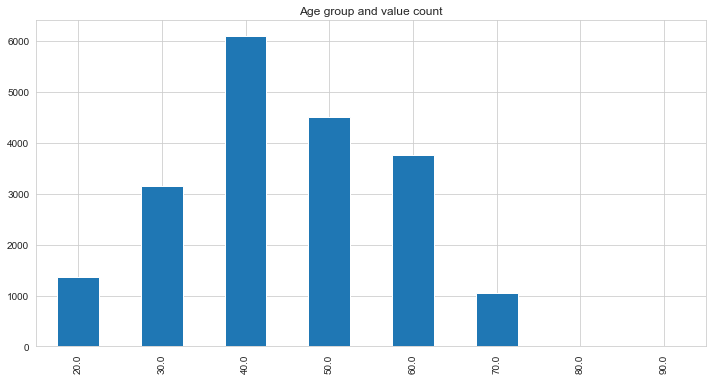

In [17]:
plt.figure(figsize=(12, 6))
customers_df['age_class'].value_counts().sort_index().plot(kind='bar')
plt.title('Age group and value count')
plt.savefig('Age group and value count-1.png')
plt.show()

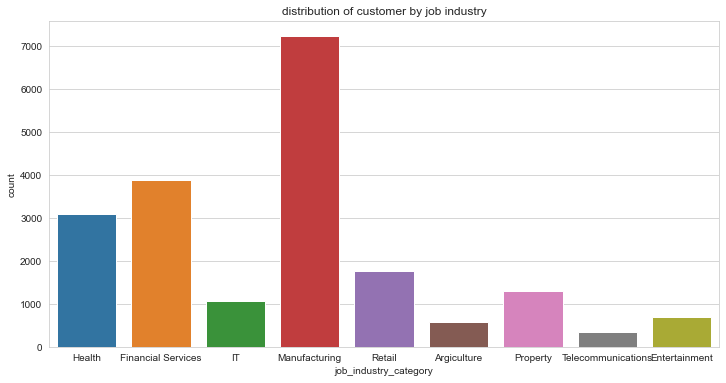

In [18]:
# customers by job industry
plt.figure(figsize=(12, 6))
sns.countplot(data=customers_df, x='job_industry_category')
plt.title('distribution of customer by job industry')
plt.savefig('distribution of customer by job industry-1.png')
plt.show()

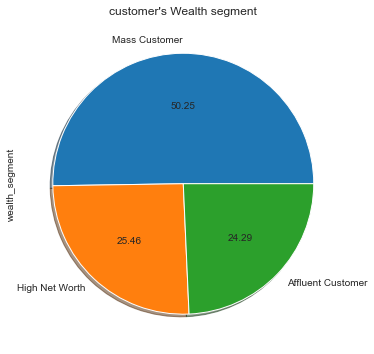

In [19]:
plt.figure(figsize=(10, 6))
customers_df['wealth_segment'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True)
plt.title('customer\'s Wealth segment')
plt.savefig('Customers wealth segment-1.png')
plt.show()

#### Bivariate or Multivariate analysis:
Analyze the relationship between each pair or between three or more features to understand the correlations and associations. For continuous variables, you can plot scatterplots and correlation matrices. For categorical variables, you can plot contingency tables and heatmaps.

In [20]:
# Sales by month, I was just curious.
customers_df['transaction_date'].dt.strftime('%m').value_counts()

10    1768
08    1745
07    1713
05    1683
01    1679
11    1663
03    1652
04    1650
12    1643
02    1620
06    1578
09    1565
Name: transaction_date, dtype: int64

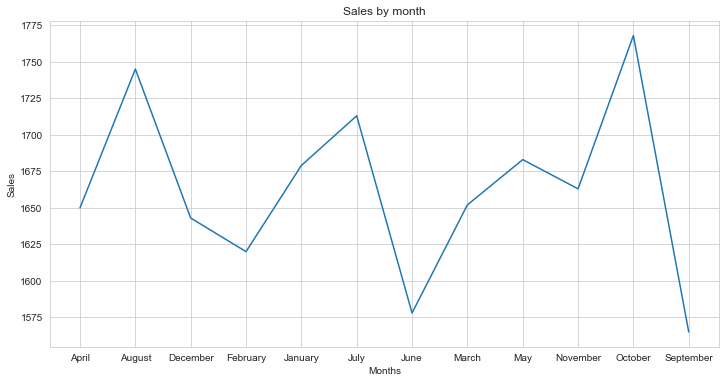

In [21]:
# line plot shows total sales by month in 2017
plt.figure(figsize=(12, 6))
sns.lineplot(customers_df.groupby(customers_df['transaction_date'].dt.strftime('%B'))['transaction_id'].count())
plt.title('Sales by month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

* Spring - the three transition months September, October and November.
* Summer - the three hottest months December, January and February.
* Autumn - the transition months March, April and May.
* Winter - the three coldest months June, July and August.

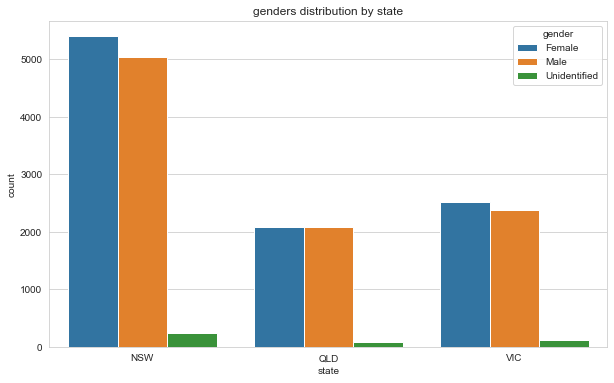

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='state', hue='gender')
plt.title('genders distribution by state')
plt.savefig('genders distribution by state-1.png')
plt.show()

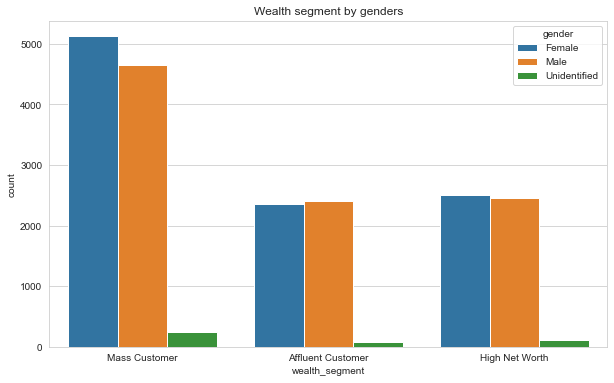

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=customers_df, x='wealth_segment', hue='gender')
plt.title('Wealth segment by genders')
plt.show()

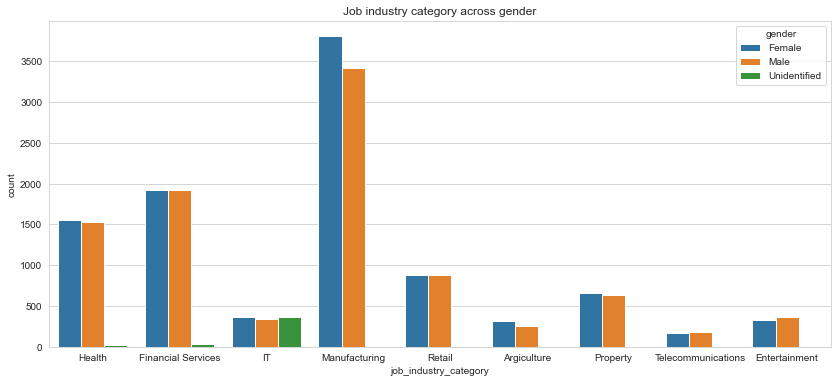

In [24]:
plt.figure(figsize = (14,6))
sns.countplot(x='job_industry_category', data=customers_df, hue='gender')
plt.title('Job industry category across gender')
plt.show()

In [25]:
df4.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,False,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,False,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,False,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,False,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,False,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  1000 non-null   object 
 5   job_title                            1000 non-null   object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   bool   
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [27]:
df4['DOB'] = pd.to_datetime(df4['DOB'])

In [28]:
df4['age'] = (dt.datetime.now() - df4['DOB']).dt.days // 365

In [29]:
# Let's create age class field
df4['age_class'] = round(df4['age']/10) * 10

In [30]:
df4['Value'] = df4['Value'].apply(lambda x: round(x, 2))

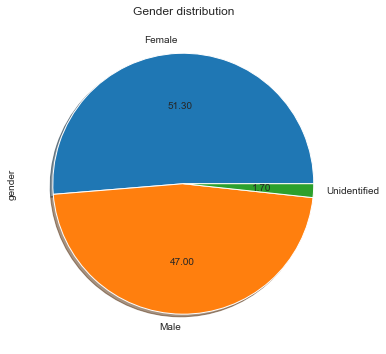

In [31]:
plt.figure(figsize=(10, 6))
df4['gender'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True)
plt.title('Gender distribution')
plt.savefig('Gender distribution-2.png')
plt.show()

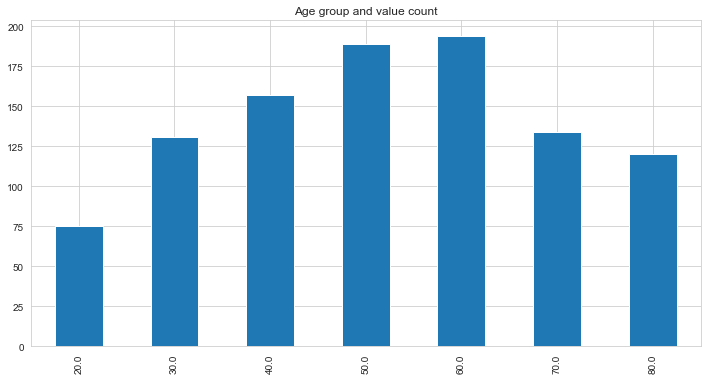

In [32]:
plt.figure(figsize=(12, 6))
df4['age_class'].value_counts().sort_index().plot(kind='bar')
plt.title('Age group and value count')
plt.savefig('Age group and value count-2.png')
plt.show()

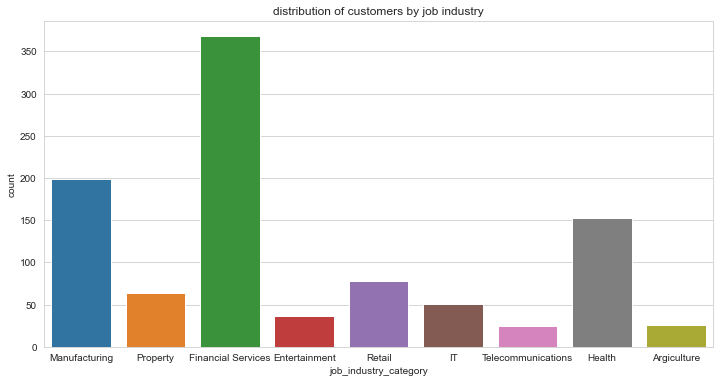

In [33]:
# customers by job industry
plt.figure(figsize=(12, 6))
sns.countplot(data=df4, x='job_industry_category')
plt.title('distribution of customers by job industry')
plt.savefig('distribution of customers by job industry-2.png')
plt.show()

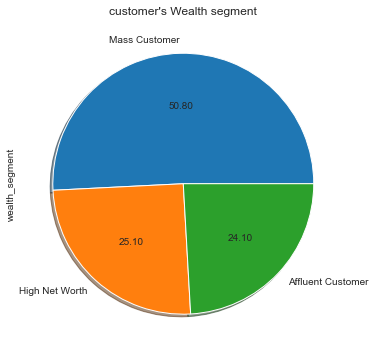

In [34]:
plt.figure(figsize=(10, 6))
df4['wealth_segment'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True)
plt.title('customer\'s Wealth segment')
plt.savefig('Customers wealth segment-2.png')
plt.show()

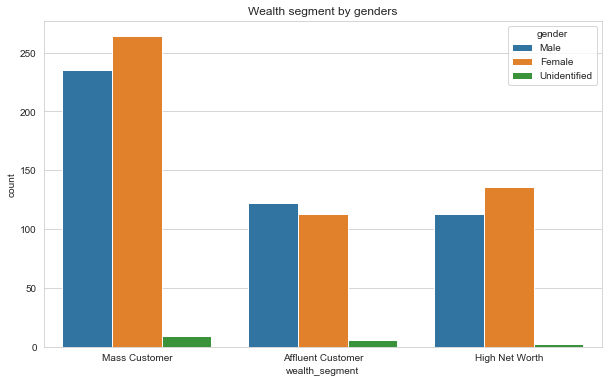

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df4, x='wealth_segment', hue='gender')
plt.title('Wealth segment by genders')
plt.show()

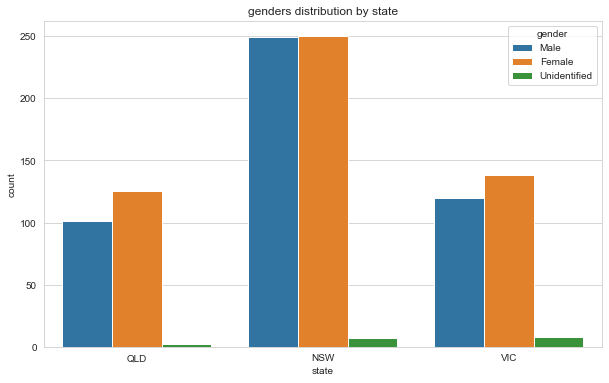

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df4, x='state', hue='gender')
plt.title('genders distribution by state')
plt.savefig('genders distribution by state-2.png')
plt.show()

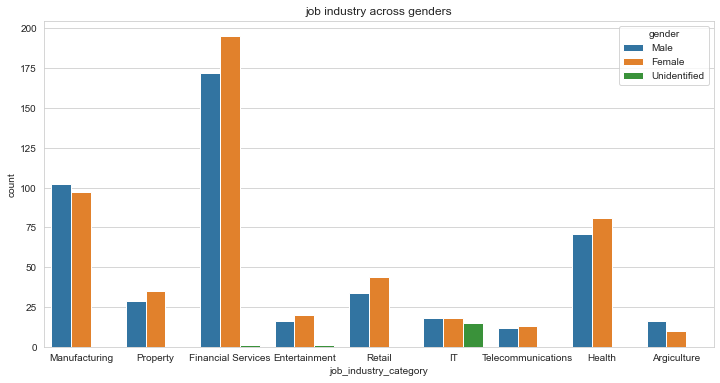

In [37]:
# customers by job industry
plt.figure(figsize=(12, 6))
sns.countplot(data=df4, x='job_industry_category', hue='gender')
plt.title('job industry across genders')
plt.show()

In [39]:
customers_df.to_csv('customer_df.csv', index=False)

In [40]:
df4.to_csv('NewCustomer.csv', index=False)